# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2)

In [4]:
# Load pickled data
import pickle

# TODO: fill this in based on where you saved the training and testing data
training_file = './data/train.p'
testing_file = './data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [8]:
### To start off let's do a basic data summary.
import numpy as np

# TODO: number of training examples
n_train = y_train.shape[0]

# TODO: number of testing examples
n_test = y_test.shape[0]

# TODO: what's the shape of an image?
image_shape = X_train.shape

# TODO: how many classes are in the dataset
n_classes = np.unique(X_train[:,-1]).size

print("Number of training examples ={}".format(n_train))
print("Number of testing examples ={}".format(n_test))
print("Image data shape ={}".format(image_shape))
print("Number of classes ={}".format( n_classes))

Number of training examples =39209
Number of testing examples =12630
Image data shape =(39209, 32, 32, 3)
Number of classes =256


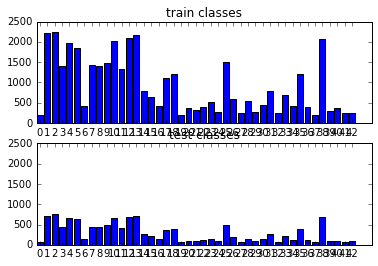

In [8]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
from explore.visualizedata import VisualizeData
from explore.exploredata import ExploreData
import matplotlib.pyplot as plt
%matplotlib inline
#class distribution:
import sys
import os
from __builtin__ import True
sys.path.insert(0, os.path.abspath('.'))
import pandas as pd

visualize_data= VisualizeData()
visualize_data.disp_class_bar()
plt.show()









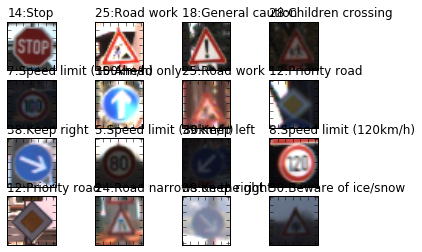

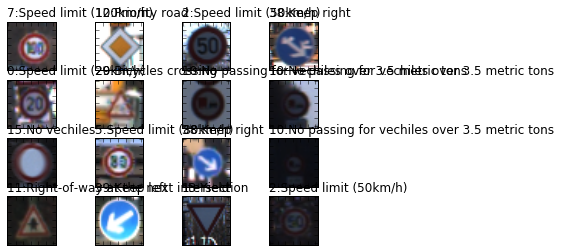

In [9]:
#train and test image samples
from explore.visualizeimages import VisualizeImages
def show_train_test_samples():
    obj = VisualizeImages()
    train_data, test_data = obj.get_train_test_data()
    obj.show_images( train_data)
    plt.show()
    obj.show_images( test_data)
    plt.show()
    return
show_train_test_samples()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [10]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
#The preprocess codes are in the preprocess/preparedata.py file

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**  
see PrepareData::__normalize method for details
1. zero centering the images
2. normalize the images

In [ ]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

#train/validation split
#The codes are in the preprocess/preparedata.py file


### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**  
1. train and validation set are derived from train.p, the records are first shuffled and then randomly split in a stratified way. It's split in a stratified way because class ration distribution is not unifrom, and we want to avoid the unlucky situation where the ratio of a particular class in trainning is too small so that we are not able to effectively learn from it. after splitting, train and validation ratio is 0.8:02. See PrepareData::_split_dataset for more details on train validation split
2. test set are derived from test.p. 
3. augmentation data is generated in an attempt to push model performance futher, specifically, in the model without data agumentation, I see high train/validation accuracy (0.99), but relatively low test accuracy (0.95). Dropout does not seem to help much with narrowing the gap, so I guess more training data might help.
4. data agumentation pipeline is: 1) randlomly shift the image [-2,2] pixels,and then rotate, with angle being [-15,15] scale [0.9,1.1), see preprocess/imageaugmentation.py for details

In [11]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
#The codes are in the implement/trafficsignmodel.py file

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**  

It's a convolutional network.
1. input layer: 32*32*3
2. convolution layer 100 filter size 3*3 + batchnormaization + relu
3. max pooling 2*2
4. convolution layer 150 filter size 3*3 + batchnormaization + relu
5. max pooling 2*2
6. convolution layer 250 filter size 3*3 + batchnormaization + relu
7. max pooling 2*2
8. Fully connected layer 300 + batchnormaization + relu + droput
9. output layer 30


In [1]:
### Train your model here.
### Feel free to use as many code cells as needed.
from implement.trafficsignmodel import TrafficSignModel
obj = TrafficSignModel()
obj.run()

computeGraph
start timer
one epoch has 490 iterations
Initialized
train loss: 4.060863[1/7350]train/val/test accuracy: 0.046875/0.034000/0.041000 [0/15]
train loss: 1.551975[98/7350]
train loss: 0.706386[196/7350]
train loss: 0.478672[294/7350]
train loss: 0.348398[392/7350]
train loss: 0.222026[490/7350]train/val/test accuracy: 0.937500/0.926000/0.847500 [1/15]
train loss: 0.250348[588/7350]
train loss: 0.152772[686/7350]
train loss: 0.134955[784/7350]
train loss: 0.074333[882/7350]
train loss: 0.086641[980/7350]train/val/test accuracy: 0.984375/0.967500/0.888500 [2/15]
train loss: 0.208453[1078/7350]
train loss: 0.114924[1176/7350]
train loss: 0.054194[1274/7350]
train loss: 0.095394[1372/7350]
train loss: 0.051698[1470/7350]train/val/test accuracy: 0.984375/0.985000/0.905500 [3/15]
train loss: 0.021073[1568/7350]
train loss: 0.053710[1666/7350]
train loss: 0.021774[1764/7350]
train loss: 0.058934[1862/7350]
learning rate decay: 0.001
train loss: 0.025698[1960/7350]train/val/test acc

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**  
Used Adam optimiser, constant learning rate 1e-3, dropout 0.2, is batch size is 64, training epochs is 15

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**  

1. reference paper Ciresan for the overall architecture desgin
2. overfit the network on a small subset of the training data set, to quickly verify that the netowrk is properly implemented
3. train the network on whole dataset, and validate them on validation dataset.
4. stop the training when the validation set acccurac is close to 1

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

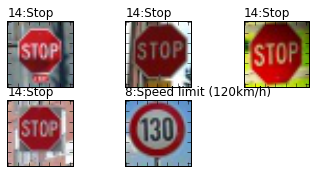

In [15]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
from utility.vis_utils import vis_grid_withlabels
from explore.exploredata import ExploreData
import os
import numpy as np
import matplotlib.image as mpimg
from utility.dumpload import DumpLoad
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
%matplotlib inline
def load_images():
    imagesFolder = './wildtrafficsign'
    imagesFile = os.listdir(imagesFolder)
    imagesFile.sort()
    webimg = np.zeros((len(imagesFile), 32, 32, 3),dtype=np.uint8)
    for i in range(0,len(webimg)):
        image = (mpimg.imread(imagesFolder+'/'+imagesFile[i]))
        webimg[i] = image[0:32,0:32,(0,1,2)]
    webimgylabel = np.array([14,14,14,14,8])
    enc = OneHotEncoder(n_values=43, sparse=False).fit(webimgylabel.reshape(-1,1))

    webimgylabel_encoded  = enc.transform(webimgylabel.reshape(-1,1))
    return (webimg, webimgylabel,webimgylabel_encoded)

def normalize_images(self, images):
    dumpload = DumpLoad('./data/meanstdimage.pickle')
    mean_image,std_image = dumpload.load()
    mean_image = mean_image.reshape(32,32,3)
    std_image = std_image.reshape(32,32,3)
    images = (images-mean_image)/ std_image
    return images

webimg, webimgylabel,webimgylabel_encoded = load_images()



vis_grid_withlabels(webimg, ExploreData().get_label_names(webimgylabel))
plt.show()

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**  
The first four are stop sign, they are with different background and deformations. The fifth is a class that does not exist in our training set, ,Speed limit (130km/h), just curious what the model prediction will be in such case, the closest should be 120 or 100 in terms of shape.

In [1]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
from implement.trafficsignmodel_predict import TrafficSignModel_Predict

obj = TrafficSignModel_Predict()
obj.run()

load model ...
restoreModel...
test accuracy 0.800000011921, predicted labelo[14 14 14 14  7]
image 0 :True 14:Stop, predicted 14:Stop
image 1 :True 14:Stop, predicted 14:Stop
image 2 :True 14:Stop, predicted 14:Stop
image 3 :True 14:Stop, predicted 14:Stop
image 4 :True 8:Speed limit (120km/h), predicted 7:Speed limit (100km/h)


/home/levin/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_  




**Answer:**  
From the limited samples collected from the web, I would say yes, the result are very good.

load model ...
restoreModel...
image 0 :True 14:Stop, predicted indices ['14:Stop', '17:No entry', '1:Speed limit (30km/h)', '13:Yield', '12:Priority road'], predicted values,[  9.99999881e-01   6.28161487e-08   1.75231696e-09   1.25903776e-09
   5.16921679e-11]
image 1 :True 14:Stop, predicted indices ['14:Stop', '17:No entry', '3:Speed limit (60km/h)', '13:Yield', '25:Road work'], predicted values,[  1.00000000e+00   3.48122668e-08   7.83379861e-10   4.87807128e-10
   1.96200625e-11]
image 2 :True 14:Stop, predicted indices ['14:Stop', '4:Speed limit (70km/h)', '17:No entry', '8:Speed limit (120km/h)', '26:Traffic signals'], predicted values,[  9.99999881e-01   1.13533041e-07   2.61626507e-08   1.35428255e-08
   1.22702355e-08]
image 3 :True 14:Stop, predicted indices ['14:Stop', '17:No entry', '12:Priority road', '21:Double curve', '13:Yield'], predicted values,[  1.00000000e+00   9.98147520e-09   4.74858486e-10   4.76033518e-11
   4.17503636e-11]
image 4 :True 8:Speed limit (120km/

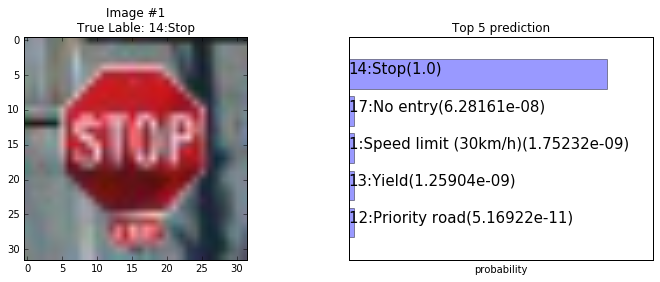

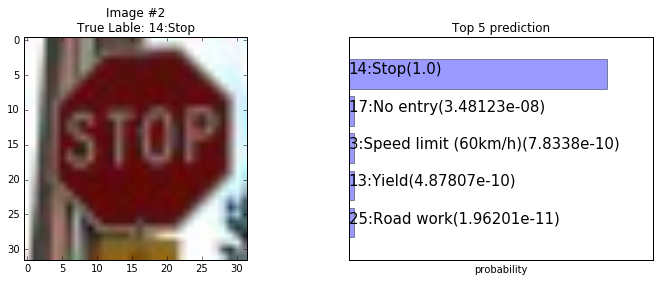

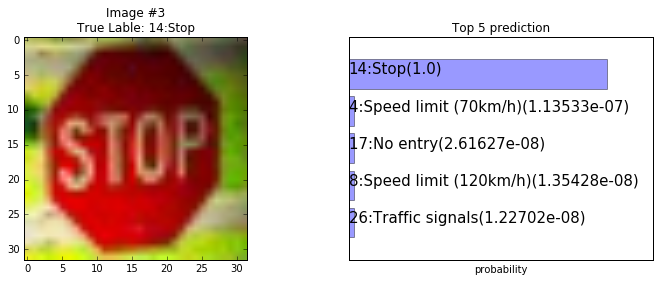

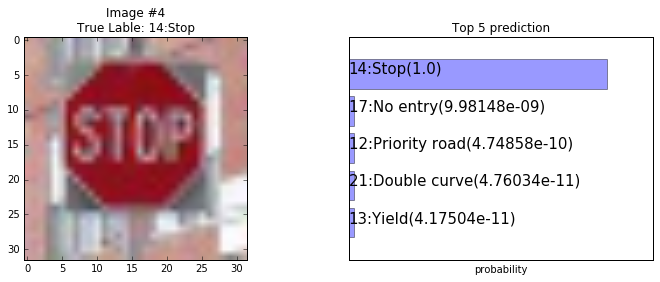

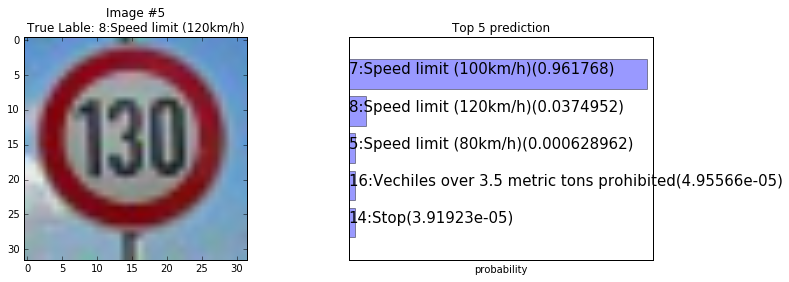

In [2]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
from implement.trafficsignmodel_predict import TrafficSignModel_Predict
%matplotlib inline
obj = TrafficSignModel_Predict()
obj.do_topk5 = True
obj.run()


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**  

From the top k result, we can clearly see that the model is quite sure about its prediction on the first four images(quite close to 1).   
Interestingly, the model's prediction on the fifith image is still quite certain (0.96), I would have expected it to be less certain. As a side note about the fitfth note, the model's second prediction is 120, which is a nice surprise.

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**  

Below are the procedures involved in loading and classifying newly-acquired images:  
1. load all the images into numpy array of shape N * 32 *32*3, N refers to the number of new images
2. with mean image and std image saved during training time, normzalize the images
3. manually lable the image, and put them into numpy array of shape N*43
4. Load the model saved during training time
5. lauch a session, and run relevant operation to get accuracy and predicted labels for the images

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.